# <center>MAC0219 EP1 - Cálculo do Conjunto de Mandelbrot em Paralelo com Pthreads e OpenMP</center>


|                Nome              |   NUSP   |
|----------------------------------|----------|
| Eduardo Freire de Carvalho Lima  | 10262627 |
| Kaique Kazuyoshi Komata          | 10297741 |
| Lucas Civile Nagamine            |  7083142 |
| Victor Hugo Miranda Pinto        | 10297720 |
| Yurick Yussuke Honda             | 10258984 |


Primeiramente, rodamos o comando na célula abaixo para instalar e atualizar os pacotes e dependências necessários para a execução dos scripts desse notebook:

In [1]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

   Updating `~/Documents/College/EPs/MAC0219/EP1/src/Project.toml`
 [no changes]
   Updating `~/Documents/College/EPs/MAC0219/EP1/src/Manifest.toml`
 [no changes]


Depois, rodamos a célula abaixo para verificar os status dos pacotes e ver se há algum problema neles:

In [4]:
] st

Status `~/Documents/College/EPs/MAC0219/EP1/src/Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.0


Após isso, entramos no modo shell para rodar o Makefile e compilar todos os scripts em C que calculam os Conjuntos de Mandelbrot:

In [52]:
; make all

make: Nothing to be done for 'all'.


Ainda no modo shell, rodamos o script <i>run_measurements.sh</i>, que executa todos os experimentos necessários e calcula  o tempo de execução com o comando <i>perf stat</i> do Linux:

In [53]:
; ./run_measurements.sh

make: Nothing to be done for 'all'.


+ MEASUREMENTS=10
+ ITERATIONS=10
+ INITIAL_SIZE=16
+ THREADS_ITERATIONS=6
+ INITIAL_THREADS=1
+ THREADS=1
+ SIZE=16
+ NAMES1=('mandelbrot_seq' 'mandelbrot_seq_sem')
+ NAMES2=('mandelbrot_pth' 'mandelbrot_omp')
+ make
+ mkdir results
+ for NAME in ${NAMES1[@]}
+ mkdir results/mandelbrot_seq
+ (( i=1 ))
+ (( i<=10 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 16
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 0.15 16
+ perf stat -r 10 -n ./mandelbrot_seq 0.175 0.375 -0.1 0.1 16
+ perf stat -r 10 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 16
+ SIZE=32
+ (( i++ ))
+ (( i<=10 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 32
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 0.15 32
+ perf stat -r 10 -n ./mandelbrot_seq 0.175 0.375 -0.1 0.1 32
+ perf stat -r 10 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 32
+ SIZE=64
+ (( i++ ))
+ (( i<=10 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 64
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 

+ THREADS=32
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 16 32
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 16 32
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 16 32
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 32
+ THREADS=64
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ THREADS=1
+ SIZE=32
+ (( i++ ))
+ (( i<=10 ))
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 32 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 32 1
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 32 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 32 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 32 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 32 2
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 32 2
+ perf stat -r 10 -n ./mandelbrot_pth -0

+ THREADS=64
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ THREADS=1
+ SIZE=512
+ (( i++ ))
+ (( i<=10 ))
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 512 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 512 1
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 512 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 512 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 512 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 512 2
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 512 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 512 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 512 4
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 512 4
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 512 4
+ perf stat -r 10 -n ./mandelbrot

+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 8192 1
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 8192 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 8192 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 8192 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 8192 2
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 8192 2
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 8192 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 8192 4
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 8192 4
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 8192 4
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 8192 4
+ THREADS=8
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 8192 8
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 

+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 128 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 128 2
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 128 2
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 128 2
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 128 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 128 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 128 4
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 128 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 128 4
+ THREADS=8
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 128 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 128 8
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 128 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.5

+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 2048 2
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 2048 2
+ THREADS=4
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 2048 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 2048 4
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 2048 4
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 2048 4
+ THREADS=8
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 2048 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 2048 8
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 2048 8
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 2048 8
+ THREADS=16
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 2048 16
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 2048 16
+ perf stat -r 10 -n ./mandelbrot_omp 0.

Na célula abaixo é definida a função <i>confidence_interval</i> que faz o cálculo de intervalo de confiança que irá ser utilizada na manipulação dos resultados e na construção do DataFrame.

In [54]:
# Se IC = valor retornado por confidence_interval(), então o intervalo de confiança 95% reside em
# [média - IC, média + IC]
function confidence_interval(sd)
    return 1.96 * sd / sqrt(10)
end

confidence_interval (generic function with 1 method)

O script <i>run_measurements</i> criará pastas com arquivos log que contém os resultados dos experimentos. Para podermos analisar esses resultados e produzir gráficos, executamos o código da célula abaixo para ler os arquivos log, extrair as informações que queremos e criar um DataFrame a partir delas.

In [59]:
using DataFrames

regions = ["full", "elephant", "seahorse", "triple_spiral"]
scripts1 = ["mandelbrot_seq", "mandelbrot_seq_sem"]
scripts2 = ["mandelbrot_pth", "mandelbrot_omp"]
scriptColumn = []
regionColumn = []
imgColumn = Int64[]
meanColumn = Float64[]
ciColumn = Float64[]
threadsColumn = []
for region in regions
    log = "$(region).log"
    for s in scripts1
        open("results/$s/$log") do file
            for ln in eachline(file)                   
                if occursin("./", ln)
                    push!(scriptColumn, s)
                    push!(regionColumn, region)
                    commands = split(ln, " ")
                    img = chop(commands[11])
                    push!(imgColumn, parse.(Int64, img))
                end
                if occursin("+-", ln)
                    result = split(ln, " ")
                    if result[8] == "seconds"
                        mean = replace(result[7], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    else
                        mean = replace(result[8], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    end                   
                    if result[56] == ")"
                        dev = replace(chop(result[55]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    else
                        dev = replace(chop(result[56]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    end
                    push!(threadsColumn, ".")
                end
            end
        end
    end
    
    for s in scripts2
        open("results/$s/$log") do file
            for ln in eachline(file)
                if occursin("./", ln)
                    push!(scriptColumn, s)
                    push!(regionColumn, region)
                    commands = split(ln, " ")
                    img = commands[11]
                    push!(imgColumn, parse.(Int64, img))
                    thread = parse.(Int64, chop(commands[12]))
                    push!(threadsColumn, thread)
                end
                if occursin("+-", ln)
                    result = split(ln, " ")
                    if result[8] == "seconds"
                        mean = replace(result[7], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    else
                        mean = replace(result[8], "," => ".")
                        mean = parse.(Float64, mean)
                        push!(meanColumn, mean)
                    end
                    if result[56] == ")"
                        dev = replace(chop(result[55]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    else
                        dev = replace(chop(result[56]), "," => ".")                    
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        ci = confidence_interval(dev)
                        push!(ciColumn, ci)
                    end
                end
            end
        end
    end
end

columns = [scriptColumn, regionColumn, imgColumn, threadsColumn, meanColumn, ciColumn];
df = DataFrame(columns, [:script, :region, :img_size, :threads, :mean, :ci])

,script,region,img_size,threads,mean,ci
,Any,Any,Any,Any,Any,Any
1,mandelbrot_seq,full,16,.,0.00133022,0.000431615
2,mandelbrot_seq,full,32,.,0.000822024,1.717e-5
3,mandelbrot_seq,full,64,.,0.00166736,3.55504e-5
4,mandelbrot_seq,full,128,.,0.00483467,0.000114469
5,mandelbrot_seq,full,256,.,0.016619,7.31342e-5
6,mandelbrot_seq,full,512,.,0.0607169,0.00040267
7,mandelbrot_seq,full,1024,.,0.236069,0.00017558
8,mandelbrot_seq,full,2048,.,0.939892,0.000640806
9,mandelbrot_seq,full,4096,.,3.84611,0.0288445


Também podemos salvar o DataFrame construído com os resultados num arquivo CSV <i>results.csv</i> executando a célula abaixo.

In [60]:
using CSV

CSV.write("results.csv", df)

"results.csv"

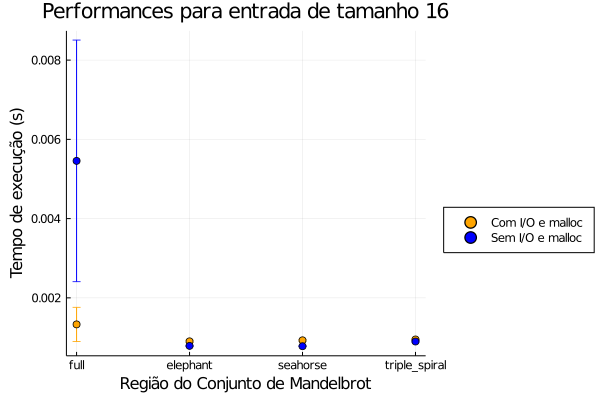

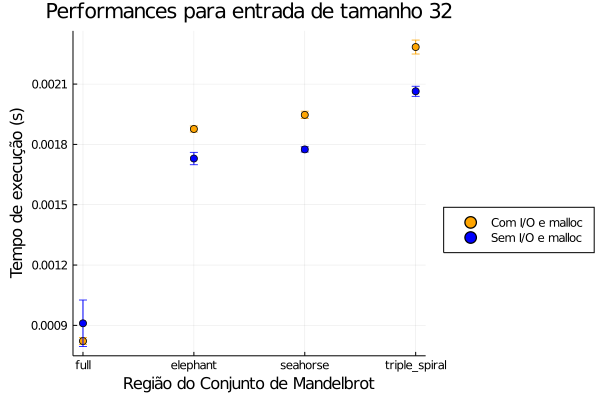

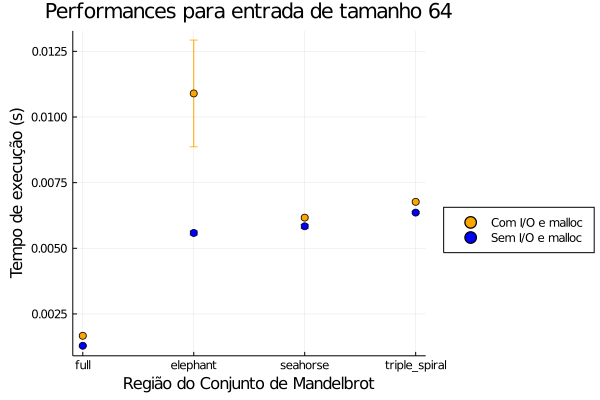

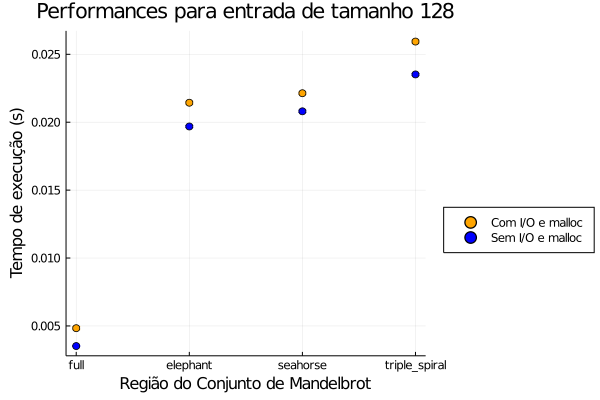

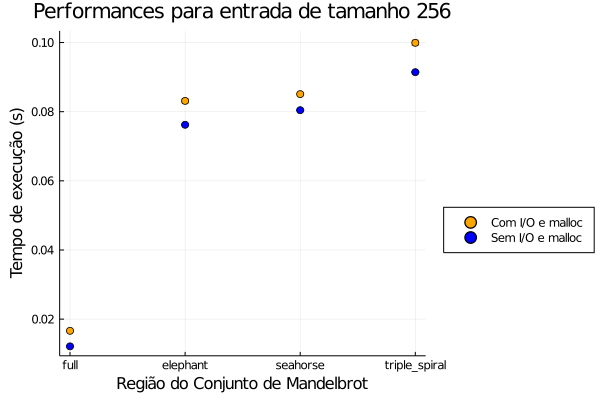

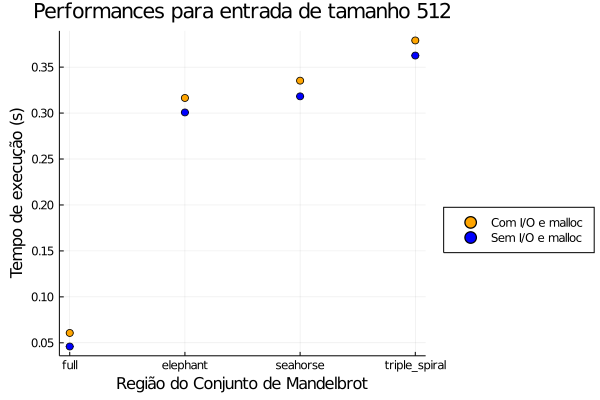

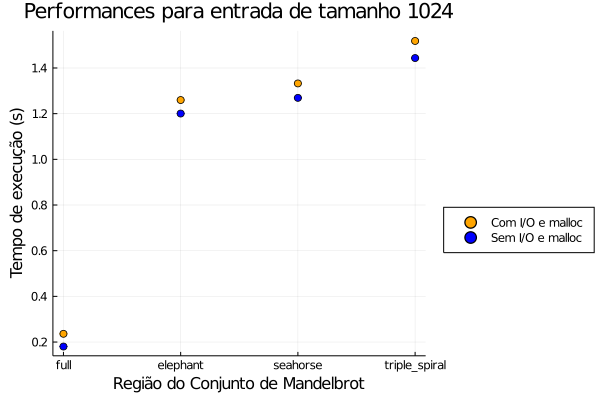

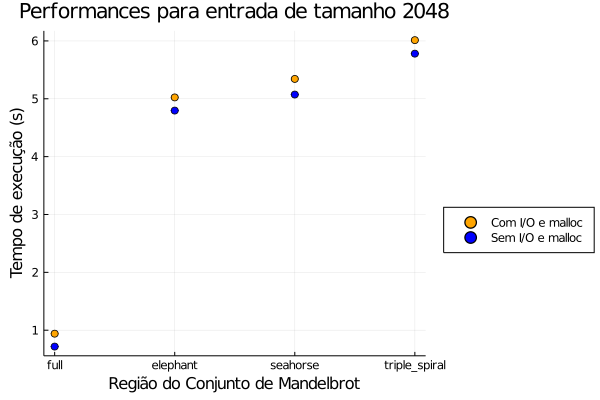

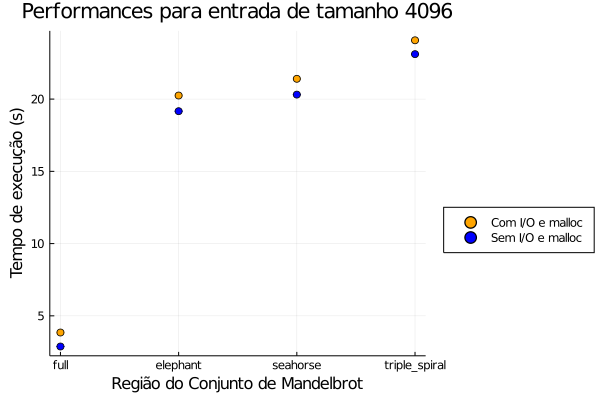

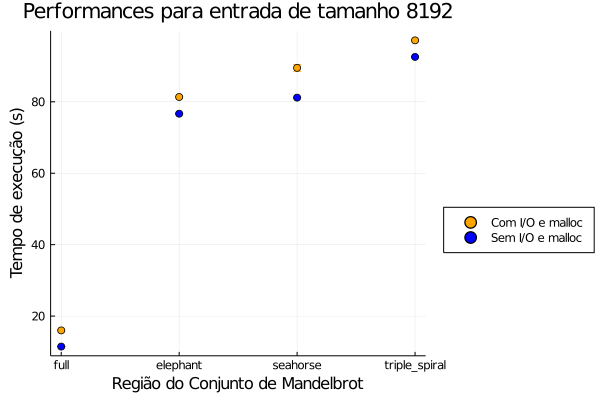

In [70]:
using Printf

function plot_sequencial(size, with_io_malloc, without_io_malloc)
    plt = plot(
        title = @sprintf("Performances para entrada de tamanho %d", size),
        xlabel = "Região do Conjunto de Mandelbrot",
        ylabel = "Tempo de execução (s)",
        legend = :outerright
    )
    scatter!(
        with_io_malloc[!, "region"],
        with_io_malloc[!, "mean"],
        yerror = with_io_malloc[!, "ci"],
        color = "orange",
        label = "Com I/O e malloc",
    )
    scatter!(
        without_io_malloc[!, "region"],
        without_io_malloc[!, "mean"],
        yerror = without_io_malloc[!, "ci"],
        color = "blue",
        label = "Sem I/O e malloc",
    )
    display(plt)
end

function charts_sequencial(data)
    for i = 4:13
        size = 2^i
        plot_sequencial(
            size,
            filter(row -> row["img_size"] == size && row["script"] == "mandelbrot_seq", data),
            filter(row -> row["img_size"] == size && row["script"] == "mandelbrot_seq_sem", data),
        )
    end
end

charts_sequencial(df)

In [63]:
using Plots
function plot_results(data, name)   
    d1 = data[data[!, :threads] .== 1, :]
    d2 = data[data[!, :threads] .== 2, :]
    d4 = data[data[!, :threads] .== 4, :]
    d8 = data[data[!, :threads] .== 8, :]
    d16 = data[data[!, :threads] .== 16, :]
    d32 = data[data[!, :threads] .== 32, :]
    dframes = [[d1, "red", "1 Thread"], [d2, "green", "2 Threads"], [d4, "blue", "4 Threads"], [d8, "grey", "8 Threads"],
        [d16, "purple", "16 Threads"], [d32, "darkorange", "32 Threads"]]
    
    fig = plot(size=(950,950), xlabel = "Tamanho da Imagem (px)", ylabel = "Tempo de Execução (s)",
        legend = :topleft, title = name)
    
    for f in dframes
        plot!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            color = f[2],
            labels = ""
        )
        scatter!(
            f[1].img_size[1:size(f[1], 1)],
            f[1].mean[1:size(f[1], 1)],
            yerror = f[1].ci[1:size(f[1], 1)],
            color = f[2],
            labels = f[3],
        )        
    end
    fig
end 

plot_results (generic function with 1 method)

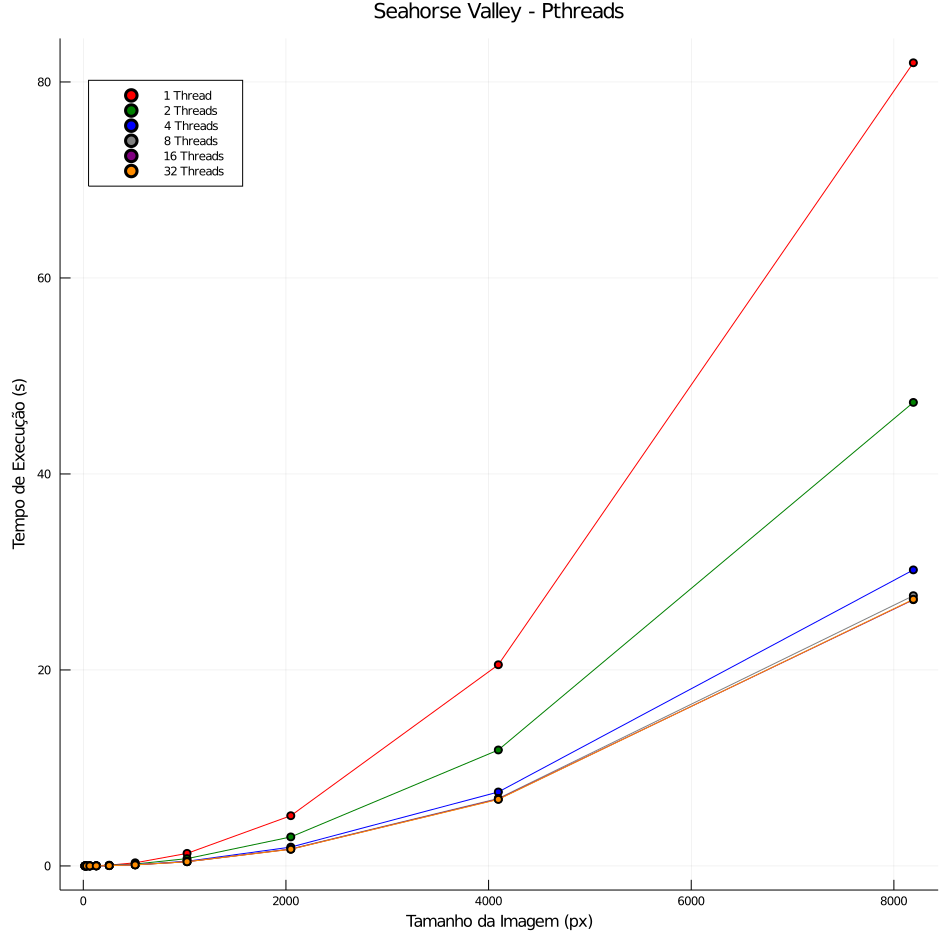

In [64]:
pth = df[df[!, :script] .== "mandelbrot_pth", :]
seahorse = pth[pth[!, :region] .== "seahorse", :]
plot_results(seahorse, "Seahorse Valley - Pthreads")

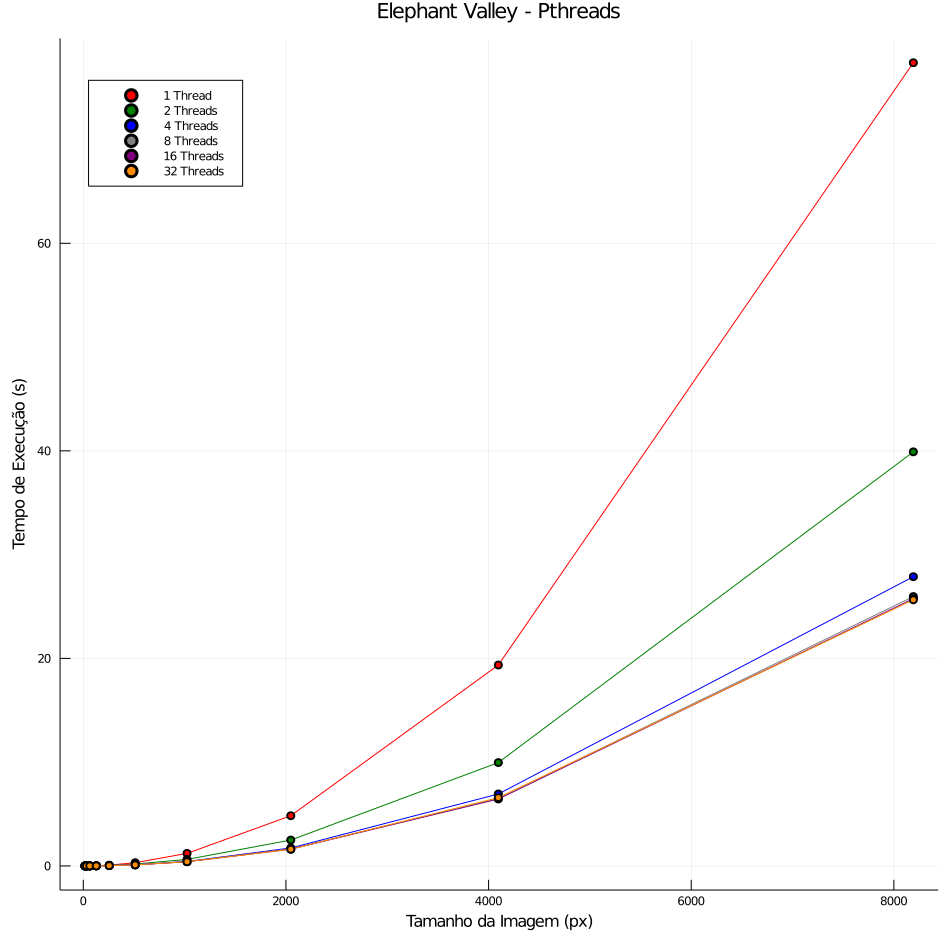

In [65]:
pth = df[df[!, :script] .== "mandelbrot_pth", :]
elephant = pth[pth[!, :region] .== "elephant", :]
plot_results(elephant, "Elephant Valley - Pthreads")

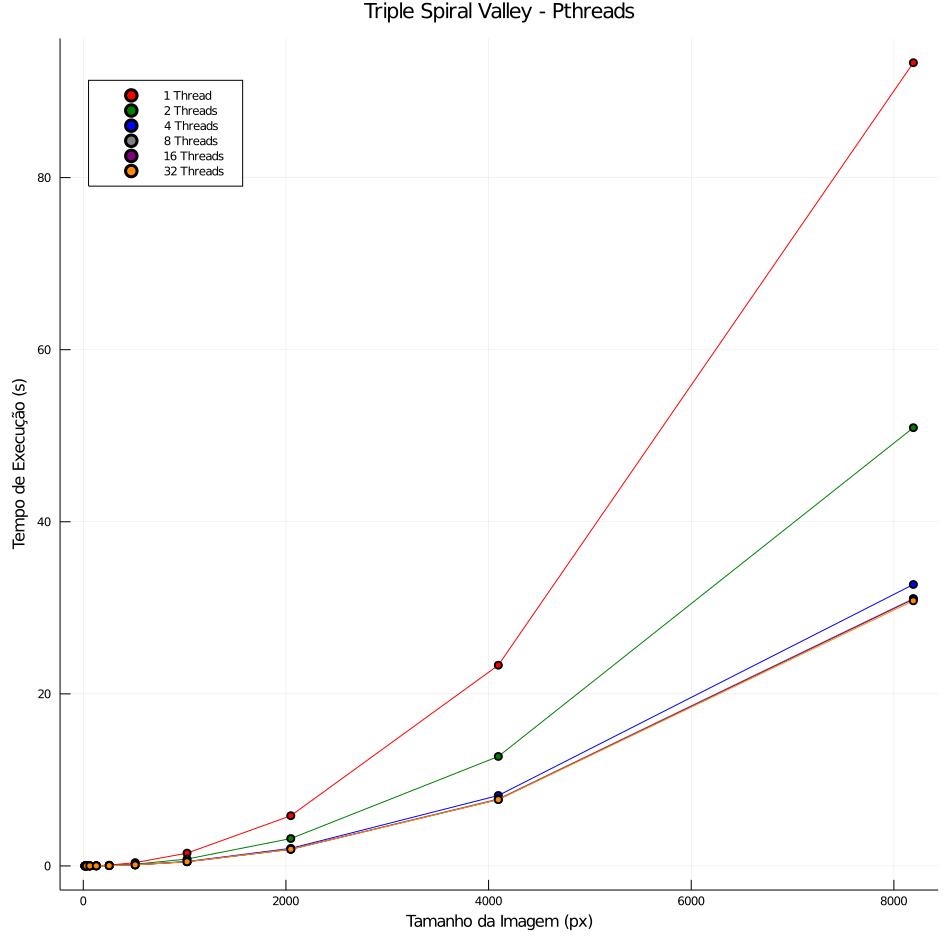

In [66]:
pth = df[df[!, :script] .== "mandelbrot_pth", :]
triple_spiral = pth[pth[!, :region] .== "triple_spiral", :]
plot_results(triple_spiral, "Triple Spiral Valley - Pthreads")

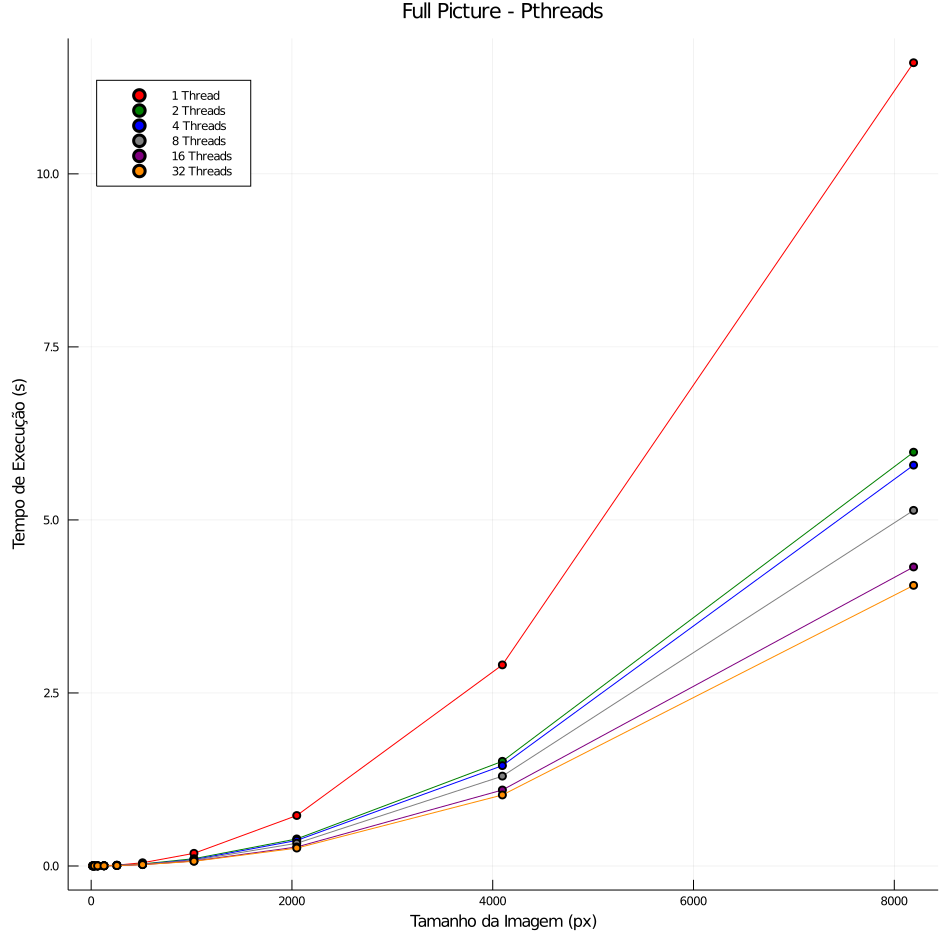

In [67]:
pth = df[df[!, :script] .== "mandelbrot_pth", :]
full = pth[pth[!, :region] .== "full", :]
plot_results(full, "Full Picture - Pthreads")